<a href="https://colab.research.google.com/github/Rodrigo-Lopes-de-Andrade/Artigos_e_Projetos/blob/main/Previsao_Pre%C3%A7os_de_Aluguel_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
    <a href="https://medium.com/rodrigo-lopesandrade" alt="Contributors">
        <img src="https://img.shields.io/badge/Medium-RLA Data Science-magenta" />
    </a>
<a href="https://linkedin.com/in/rodrigo-lopes-de-andrade-51753246" alt="Contributors">
        <img src="https://img.shields.io/badge/Linkedin-Rodrigo Lopes de Andrade-cyan" />
    </a>
<a href="https://github.com/Rodrigo-Lopes-de-Andrade" alt="Contributors">
        <img src="https://img.shields.io/badge/GitHub-Rodrigo Lopes de Andrade-purple" />
    </a>
<p align="center">
  <img src="https://raw.githubusercontent.com/Rodrigo-Lopes-de-Andrade/Portifolio_Rodrigo_Andrade/main/LOGORLA.JPG" >
</p>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt

# Objetivo

Neste notebook, você deve fazer uma análise exploratória de dados, engenharia de recursos, tratamento de dados e aplicação de modelos de Aprendizado de Máquina para prever o **VALOR DO ALUGUEL (R $)**.
Vou seguir este script:
1. Fazer uma EDA para obter insights e escolher as melhores características;
2. Pré-processar os dados;
3. Testar os modelos e escolher o melhor;
4. Realizar o teste final com o modelo escolhido.

# Carregar dados

In [ ]:
raw_data = pd.read_csv('/content/houses_to_rent_v2.csv')
raw_data.head(20)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955


Os recursos são:
* **cidade** - cidade onde o imóvel está localizado
* **área** - área da propriedade
* **quartos** - quantidade de quartos
* **banheiro** - quantidade de banheiros
* **vagas** - quantidade de vagas
* **chão** - chão
* **animal** - aceita animais?
* **móveis** - móveis?
* **hoa** - Imposto de associação de proprietários
* **IPTU** - IPTU / IPTU
* **valor do aluguel** - preço do aluguel
* **seguro contra incêndio** - seguro contra incêndio
* **total** - valor total


# Análise exploratória de dados (EDA)

#### Shape

In [ ]:
print('ROWS: ', raw_data.shape[0])
print('COLUMNS: ', raw_data.shape[1])

ROWS:  10692
COLUMNS:  13


#### Informações Básicas

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


#### Descrição básica

In [ ]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,6080.0,3039.500000,1755.289150,0.0,1519.75,3039.5,4559.25,6079.0
city,6080.0,0.863322,0.343535,0.0,1.00,1.0,1.00,1.0
area,6080.0,151.143914,375.559485,10.0,58.00,100.0,200.00,24606.0
rooms,6080.0,2.492599,1.129665,1.0,2.00,3.0,3.00,10.0
bathroom,6080.0,2.341612,1.438860,1.0,1.00,2.0,3.00,10.0
parking spaces,6080.0,1.756250,1.611909,0.0,1.00,1.0,2.00,12.0


#### Valores NULL

In [ ]:
raw_data.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

Se for um conjunto de dados Kaggle, é normal não ter dados nulos.

### Valor do aluguel (R $) - Análise

#### Histogram


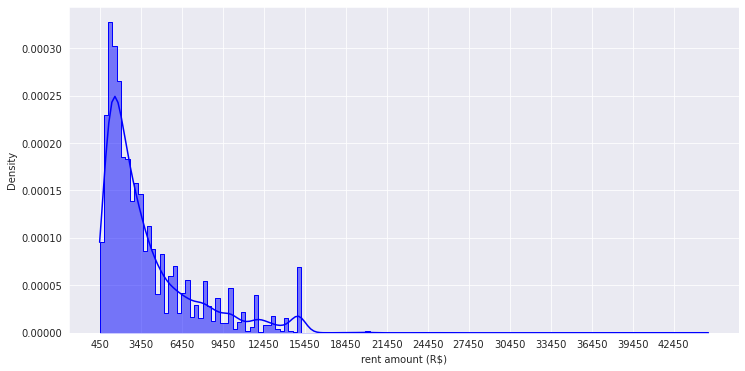

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(raw_data['rent amount (R$)'], element='step',  stat="density", kde=True, color='blue')
plt.xticks(np.arange(raw_data['rent amount (R$)'].min(), raw_data['rent amount (R$)'].max(), step=3000));

Há uma forte assimetria à direita (**inclinação a esquerda**) e a maior parte do valor do aluguel fica entre 450,00 e 3.450,00. Há uma grande chance de que haja vários outliers nesses dados, e pelo meu conhecimento de negócios, um aluguel custando mais de R $ **12.000,00** é algo estranho ...

#### Boxplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


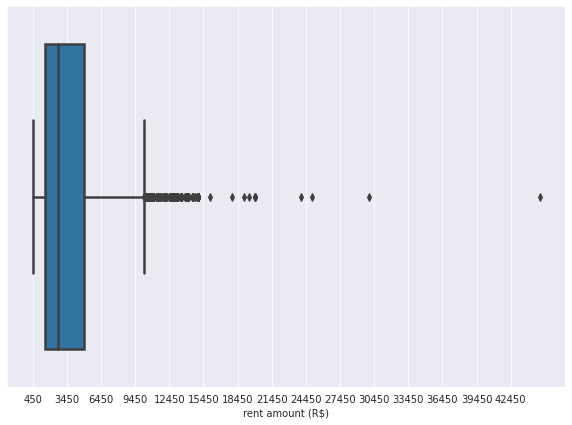

In [ ]:
plt.figure(figsize=(10, 7))

sns.boxplot(raw_data['rent amount (R$)'], linewidth=2.5)
plt.xticks(np.arange(raw_data['rent amount (R$)'].min(), raw_data['rent amount (R$)'].max(), step=3000))

plt.show()

Conforme declarado anteriormente, existem vários valores discrepantes após **9.500,00**.

In [ ]:
raw_data.loc[raw_data['rent amount (R$)']>=9500].shape[0]

940

### City

In [ ]:
cities = raw_data['city'].unique()
cities

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

#### Histograma

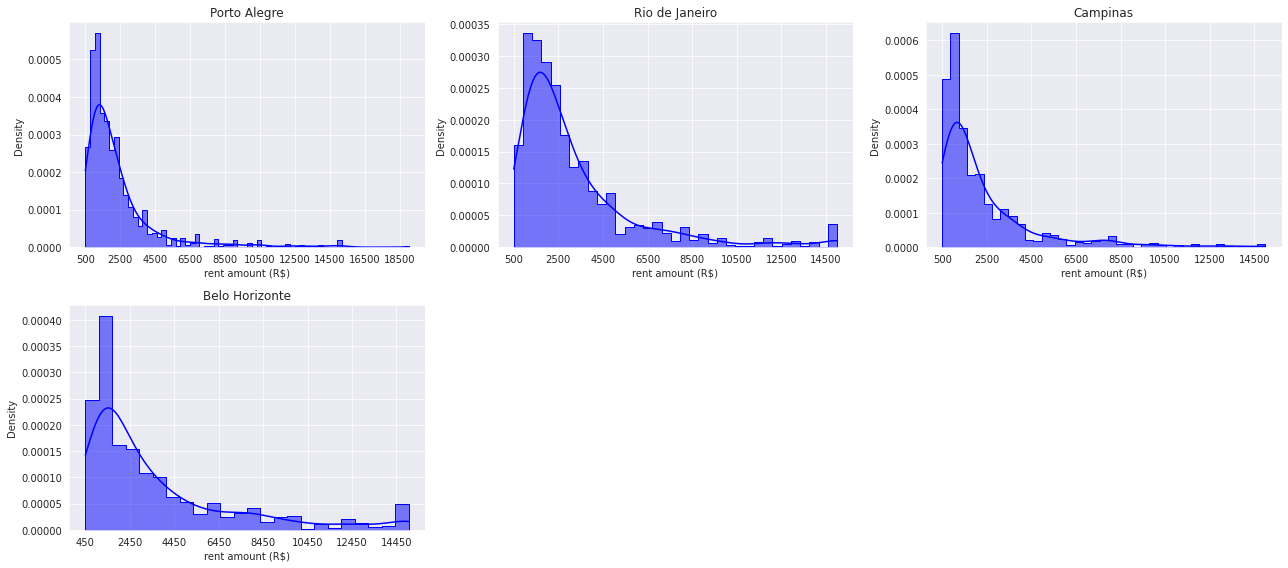

In [ ]:
plt.figure(figsize=(18, 8))

i = 1
for city in cities:
    
    if city == 'São Paulo':
        continue
    
    plt.subplot(2, 3, i)
    plt.title(city)
    city_name = raw_data.loc[raw_data['city'] == city]
    sns.histplot(city_name['rent amount (R$)'],element='step',  stat="density", kde=True, color='blue')
    plt.xticks(np.arange(city_name['rent amount (R$)'].min(), city_name['rent amount (R$)'].max(), step=2000))
    i+=1
    

plt.tight_layout()
plt.show()

rents in these 4 cities have asymmetry on the right and do not usually exceed **2.500,00**.

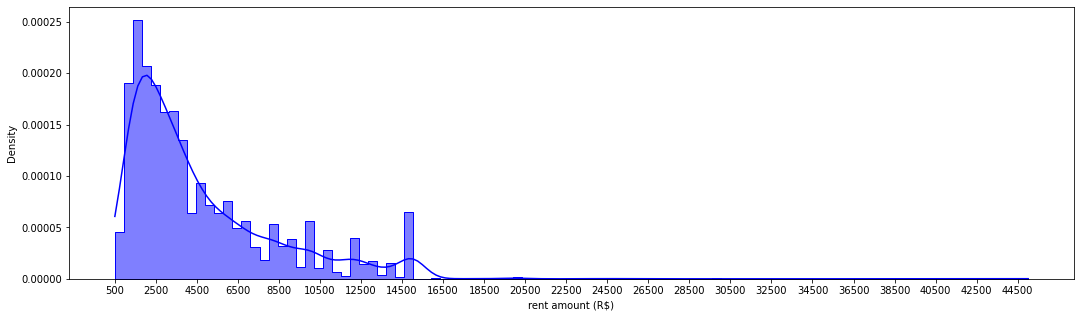

In [ ]:
plt.figure(figsize=(18, 5))

sp = raw_data.loc[raw_data['city'] == 'São Paulo']
sns.histplot(sp['rent amount (R$)'],element='step',  stat="density", kde=True, color='blue')
plt.xticks(np.arange(sp['rent amount (R$)'].min(), sp['rent amount (R$)'].max(), step=2000))

plt.show()

Em São Paulo, os dados continuam com assimetria certa, e a maior parte dos valores de locação **ultrapassa 2.500,00** a quase **4.500,00**.

#### Boxplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

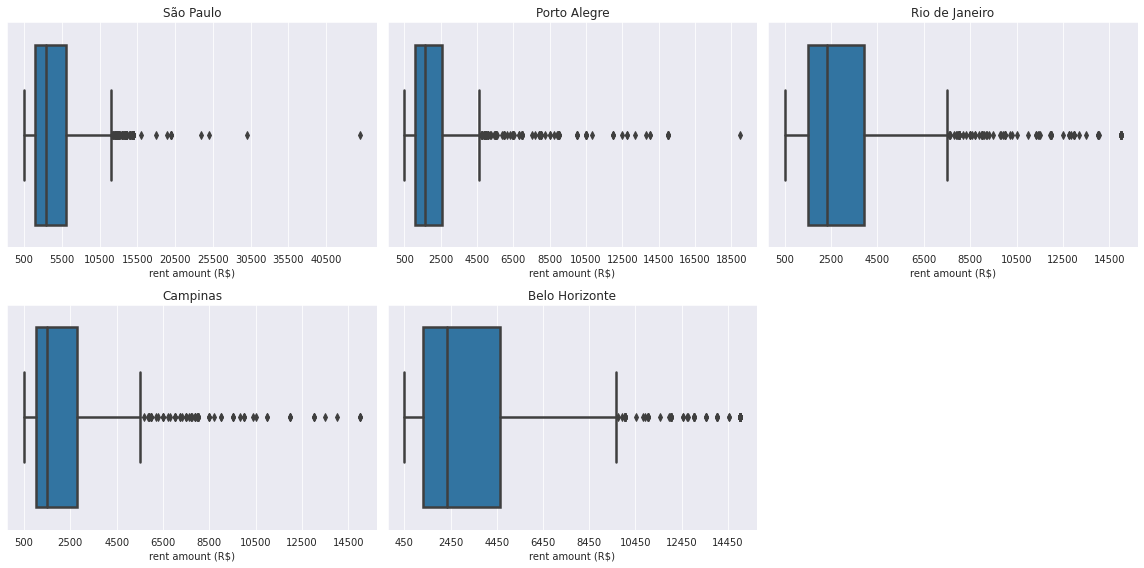

In [ ]:
plt.figure(figsize=(16, 8))

i = 1
step = 5000
for city in cities:
    if step < 2000:
        step = 2000
    plt.subplot(2, 3, i)
    plt.title(city)
    city_name = raw_data.loc[raw_data['city'] == city]
    sns.boxplot(city_name['rent amount (R$)'], linewidth=2.5)
    plt.xticks(np.arange(city_name['rent amount (R$)'].min(), city_name['rent amount (R$)'].max(),
                        step=step))
    step-=3000
    i+=1

    

plt.tight_layout()
plt.show()

Desconsiderando outliers:
- **São Paulo**: valor do aluguel em torno de **500,0** 0 a **12.000,00**
- **Porto Alegre**: valor do aluguel em torno de **500,00** a **4.500,00**
- **Rio de Janeiro**: valor do aluguel em torno de **500,00** a **7.500,00**
- **Campinas**: valor do aluguel em torno de **500,00** a **5.500,00**
- **Belo Horizonte**: valor do aluguel em torno de **500,00** a **9.500,00**

## Correlações

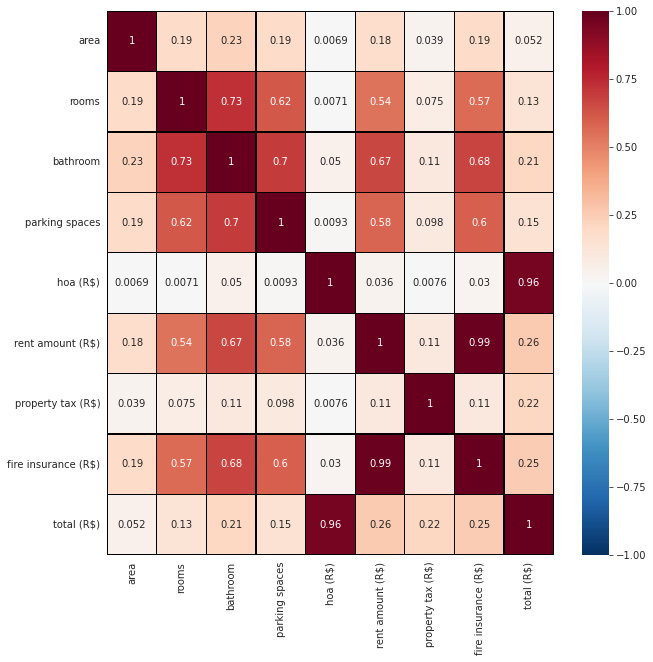

In [ ]:
plt.figure(figsize=(10, 10))

numData = raw_data._get_numeric_data()
var_num_corr = numData.corr()

sns.heatmap(var_num_corr, vmin=-1, vmax=1, annot=True, linewidth=0.1, linecolor='black', cmap='RdBu_r')

plt.show()

In [ ]:
var_num_corr['rent amount (R$)'].round(3)

area                   0.181
rooms                  0.542
bathroom               0.669
parking spaces         0.578
hoa (R$)               0.036
rent amount (R$)       1.000
property tax (R$)      0.108
fire insurance (R$)    0.987
total (R$)             0.264
Name: rent amount (R$), dtype: float64

As características que mais influenciam positivamente o ** valor do aluguel ** (correlação> = 0,5) são:
* quartos
* banheiro
* vagas de estacionamento
* seguro contra incêndio (R $)

Vou analisá-los melhor abaixo:

## Análise de características importantes

### rooms

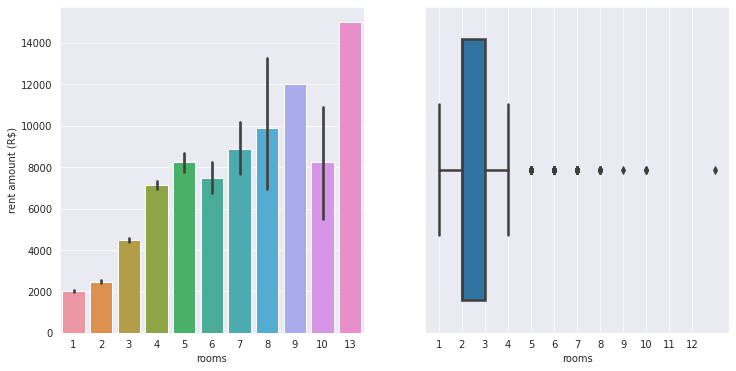

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=raw_data['rooms'], y=raw_data['rent amount (R$)'])

plt.subplot(1, 2, 2)
sns.boxplot(x=raw_data['rooms'],linewidth=2.5)
plt.xticks(np.arange(raw_data['rooms'].min(), raw_data['rooms'].max(), step=1))


plt.show()

In [ ]:
raw_data.loc[raw_data.rooms>=7].shape[0]

52

O número de quartos geralmente varia entre 1 e 4, e percebemos que quanto mais quartos, maior o aluguel, o que já é esperado. O valor de 10 quartos é estranho ...

### Bathroom


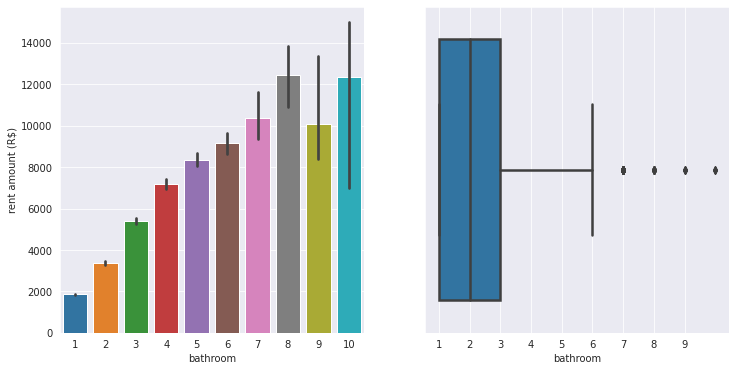

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=raw_data['bathroom'], y=raw_data['rent amount (R$)'])

plt.subplot(1, 2, 2)
sns.boxplot(x=raw_data['bathroom'],linewidth=2.5)
plt.xticks(np.arange(raw_data['bathroom'].min(), raw_data['bathroom'].max(), step=1))


plt.show()

In [ ]:
raw_data.loc[raw_data.bathroom>=7].shape[0]

103

O número de banheiros costuma variar entre 1 e 6, e percebemos que quanto mais banheiros, maior o aluguel, o que já é esperado. O valor de 9 banheiros é estranho ...

### Parking spaces

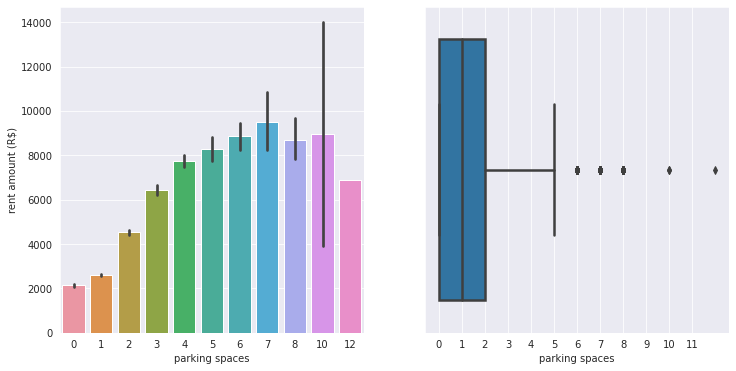

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=raw_data['parking spaces'], y=raw_data['rent amount (R$)'])

plt.subplot(1, 2, 2)
sns.boxplot(x=raw_data['parking spaces'],linewidth=2.5)
plt.xticks(np.arange(raw_data['parking spaces'].min(), raw_data['parking spaces'].max(), step=1))


plt.show()

In [ ]:
raw_data.loc[raw_data.bathroom>=7].shape[0]

103

O número de vagas geralmente varia entre 0 e 5, e percebemos que quanto mais vagas, maior é o aluguel, o que já é esperado. O valor começa a diminuir a partir de 7 vagas, algo estranho ...

### Fire insurance

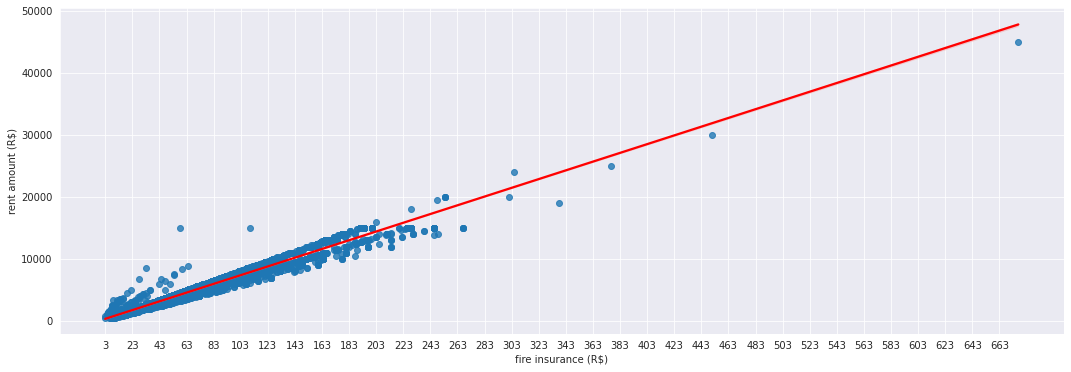

In [ ]:
plt.figure(figsize=(18, 6))

sns.regplot(x=raw_data['fire insurance (R$)'], y=raw_data['rent amount (R$)'], line_kws={'color': 'r'})
plt.xticks(np.arange(raw_data['fire insurance (R$)'].min(), raw_data['fire insurance (R$)'].max(), step=20))

plt.show()

O valor do **seguro contra incêndio** influencia positivamente o **valor do aluguel**. A maioria dos valores está entre **3,00** e **200,00**.

### Furniture

In [ ]:
furniture = raw_data['furniture'].value_counts()
pd.DataFrame(furniture)

,furniture
not furnished,8086
furnished,2606


Existem cerca de 3x mais casas sem mobília do que mobiliadas

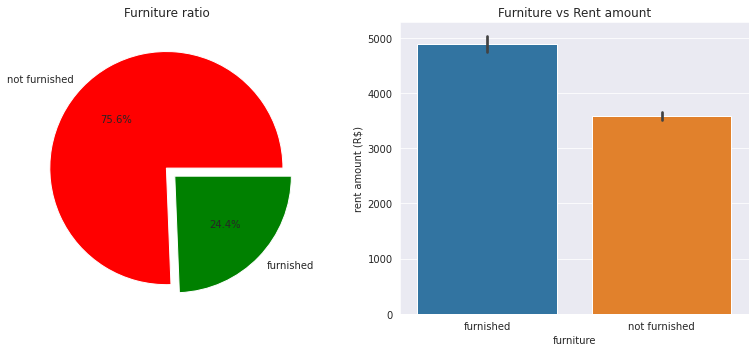

In [ ]:
plt.figure(figsize=(11, 5))

plt.subplot(1, 2, 1)
plt.title('Furniture ratio')
plt.pie(furniture, labels = ['not furnished', 'furnished'], colors= ['r', 'g'], 
        explode = (0, 0.1), autopct='%1.1f%%')

plt.subplot(1, 2, 2)
plt.title('Furniture vs Rent amount')
sns.barplot(x=raw_data['furniture'], y=raw_data['rent amount (R$)'])

plt.tight_layout()
plt.show()

O fato da casa **ser mobiliada** aumenta **o valor do aluguel **

## Análise de características *não tão importantes*

### Animal

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


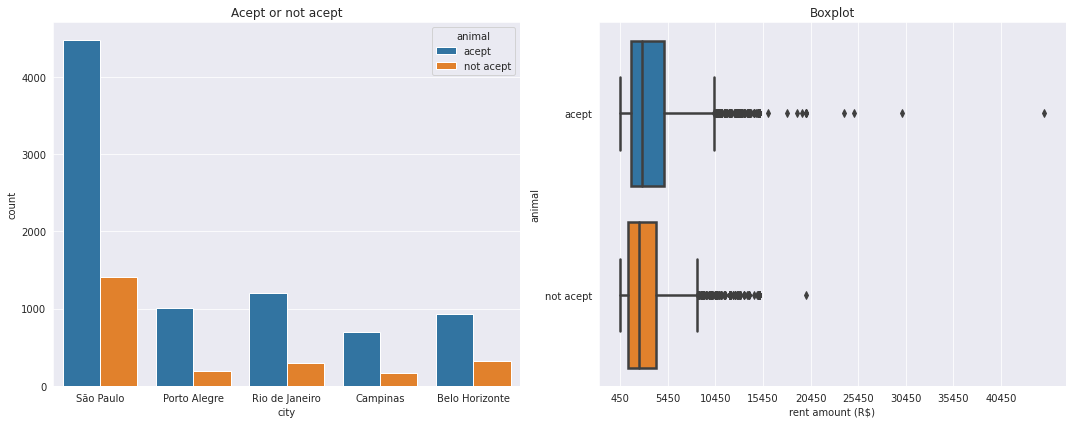

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.title('Acept or not acept')
sns.countplot(raw_data['city'], hue=raw_data['animal'])

plt.subplot(1, 2, 2)
plt.title('Boxplot')
sns.boxplot(x=raw_data['rent amount (R$)'], y=raw_data['animal'], linewidth=2.5)
plt.xticks(np.arange(raw_data['rent amount (R$)'].min(), raw_data['rent amount (R$)'].max(), step=5000))

plt.tight_layout()
plt.show()

Aceitar ou não animais no preço tem pequena influência no aumento do **valor do aluguel**.

### hoa

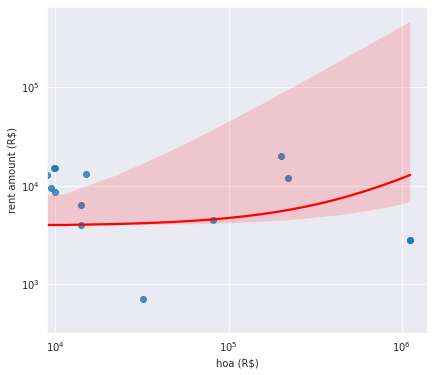

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.regplot(x=raw_data['hoa (R$)'], y=raw_data['rent amount (R$)'], line_kws={'color': 'r'})
plt.xscale('log')
plt.yscale('log')

plt.show()

Não parece haver muita correlação entre o **hoa** e o **preço do aluguel**.

### Property tax

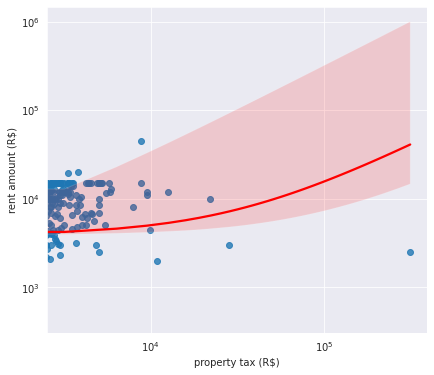

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.regplot(x=raw_data['property tax (R$)'], y=raw_data['rent amount (R$)'], line_kws={'color': 'r'})
plt.xscale('log')
plt.yscale('log')

plt.show()

Não parece haver muita correlação entre o **imposto sobre a propriedade** e o **preço do aluguel**.

### Area

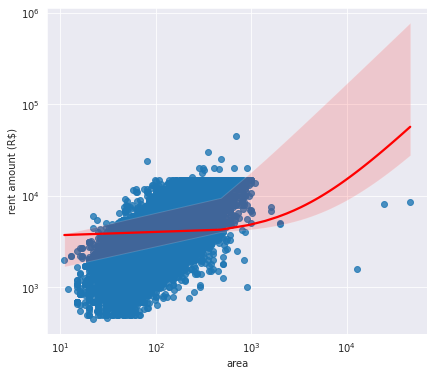

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.regplot(x=raw_data['area'], y=raw_data['rent amount (R$)'], line_kws={'color': 'r'})
plt.xscale('log')
plt.yscale('log')

plt.show()

Não parece haver muita correlação entre a **área ** e o **preço do aluguel**.

# Testando modelos de ML

In [ ]:
! pip install h5py scikit-optimize

     |████████████████████████████████| 101 kB 5.6 MB/s 


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from skopt import gp_minimize

# ML models
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor

Como esta é uma previsão de valor contínua, usarei modelos de regressão.

Neste primeiro momento, retirarei os outliers dos dados usando o intervalo interquartil.

### preço do aluguel (R $) com outliers




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


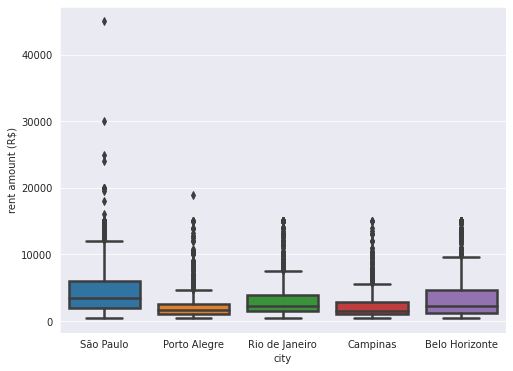

In [ ]:
plt.figure(figsize=(8, 6))

sns.boxplot(raw_data['city'], raw_data['rent amount (R$)'], linewidth=2.5)

plt.show()

Os preços máximos de aluguel geralmente não excedem **15.000**, mas com valores discrepantes eles chegam a **40.000**.

### Select quantiles

In [ ]:
# Grouping cities
city_group = raw_data.groupby('city')['rent amount (R$)']

In [ ]:
# Quantile 1 = 25% of data
Q1 = city_group.quantile(.25)
Q3 = city_group.quantile(.75)

# IQR = Interquartile Range
IQR = Q3 - Q1

# Limits
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

### Remove outliers

In [ ]:
# DataFrame to store the new data
new_data = pd.DataFrame()

for city in city_group.groups.keys():
    is_city = raw_data['city'] == city
    accepted_limit = ((raw_data['rent amount (R$)'] >= lower[city]) &
                     (raw_data['rent amount (R$)'] <= upper[city]))
    
    select = is_city & accepted_limit
    data_select = raw_data[select]
    new_data = pd.concat([new_data, data_select])

new_data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
21,Belo Horizonte,42,1,1,1,17,not acept,furnished,470,2690,172,36,3368
27,Belo Horizonte,64,2,2,1,11,acept,not furnished,352,1500,80,20,1952
42,Belo Horizonte,200,4,2,1,7,not acept,not furnished,850,2550,9,34,3443
43,Belo Horizonte,45,1,1,1,5,acept,not furnished,500,1631,192,12,2335
46,Belo Horizonte,100,3,1,0,13,not acept,not furnished,700,1220,10,17,1947


### Comparation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


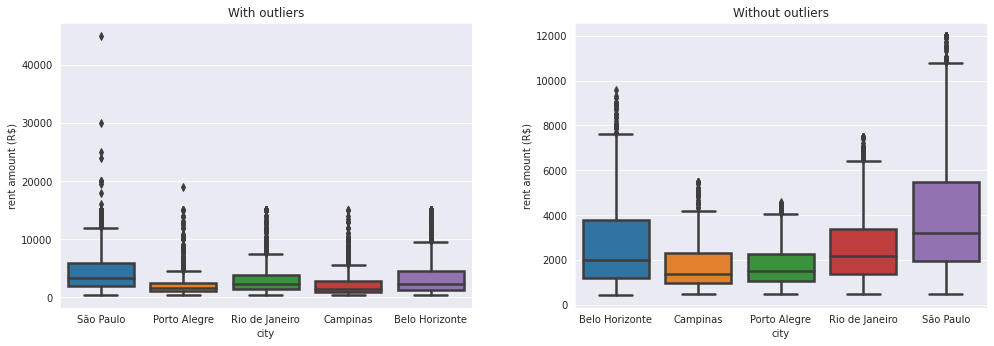

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.title('With outliers')
sns.boxplot(raw_data['city'], raw_data['rent amount (R$)'],linewidth=2.5)

plt.subplot(1, 2, 2)
plt.title('Without outliers')
sns.boxplot(new_data['city'], new_data['rent amount (R$)'],linewidth=2.5)

plt.tight_layout(pad=5.0)
plt.show()


Muito melhor!
P.S. Obrigado a [Samuel Natividade] (http://www.kaggle.com/juxwzera) pelo notebook muito útil.

### Train new data without outliers

#### Categorical columns handler

In [ ]:
catTransformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

#### Numerical columns handler

In [ ]:
numTransformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

#### Select FEATURES (X)

In [ ]:
cols = ['city', 'rooms', 'bathroom', 'parking spaces', 'fire insurance (R$)',
        'furniture']

X = new_data[cols]
X.head()

,city,rooms,bathroom,parking spaces,fire insurance (R$),furniture
21,Belo Horizonte,1,1,1,36,furnished
27,Belo Horizonte,2,2,1,20,not furnished
42,Belo Horizonte,4,2,1,34,not furnished
43,Belo Horizonte,1,1,1,12,not furnished
46,Belo Horizonte,3,1,0,17,not furnished


In [ ]:
for col in X:
    X = X.astype('category')
X['fire insurance (R$)'] = X['fire insurance (R$)'].astype('int64')
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 21 to 10691
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   city                 9974 non-null   category
 1   rooms                9974 non-null   category
 2   bathroom             9974 non-null   category
 3   parking spaces       9974 non-null   category
 4   fire insurance (R$)  9974 non-null   int64   
 5   furniture            9974 non-null   category
dtypes: category(5), int64(1)
memory usage: 526.0 KB


#### Select TARGET (y)

In [ ]:
y = new_data['rent amount (R$)']
y

21        2690
27        1500
42        2550
43        1631
46        1220
         ...  
10680     2200
10681    11000
10683     4000
10685     7521
10691     1400
Name: rent amount (R$), Length: 9974, dtype: int64

#### Select numerical features

In [ ]:
numFeatures = X.select_dtypes(include=['int64', 'float64']).columns
numFeatures

Index(['fire insurance (R$)'], dtype='object')

#### Select categorical features

In [ ]:
catFeatures = X.select_dtypes(include=['category']).columns
catFeatures

Index(['city', 'rooms', 'bathroom', 'parking spaces', 'furniture'], dtype='object')

#### Handling numerical and categorical features

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numTransformer, numFeatures),
        ('categoric', catTransformer, catFeatures)
    ])

#### Select TRAIN and TEST data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#### List of ML models

In [ ]:
regressors = [
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(),
    LinearRegression(),
    XGBRegressor()
]

#### Fit all ML models and select best

In [ ]:
# Seed
np.random.seed(42)

for regressor in regressors:
    
    estimator = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', regressor)
    ])
    
    estimator.fit(X_train, y_train)
    preds = estimator.predict(X_test)
    
    print(regressor)

    print('MAE:', mean_absolute_error(y_test, preds))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, preds)))
    print('R2:', r2_score(y_test, preds))
    print('-' * 40)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
MAE: 145.045926856664
RMSE: 382.5919790806073
R2: 0.9772624104086012
----------------------------------------
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start

Neste caso específico, **XGBoost** apresentou melhores resultados em comparação com os outros modelos.

## RandomizedSearchCV with the best model (XGBRegressor)

In [ ]:
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('model', XGBRegressor(random_state=42))
                      ])

In [ ]:
params = {
        'model__learning_rate': np.arange(0.01, 0.1),
        'model__n_estimators': np.arange(100, 1000, step=50),
        'model__max_depth': np.arange(1, 20, step=2),
        'model__subsample': [0.8, 0.9, 1],
        'model__colsample_bytree': [0.8, 0.9, 1],
        'model__gamma': [0, 1, 3, 5]
         }

In [ ]:
estimator = RandomizedSearchCV(pipe, cv=20, param_distributions=params, n_jobs=-1)
estimator.fit(X_train,y_train)

[02:14:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=20, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('preprocessor',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='drop',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('numeric',
                                                                               Pipeline(memory=None,
                                                                                        steps=[('scaler',
                                                                                                StandardScaler(copy=True,
                                                                                          

In [ ]:
estimator.best_params_

{'model__colsample_bytree': 0.8,
 'model__gamma': 0,
 'model__learning_rate': 0.01,
 'model__max_depth': 5,
 'model__n_estimators': 950,
 'model__subsample': 1}

#### Treine com o melhor modelo e melhores parâmetros 

In [ ]:
estimator = XGBRegressor(colsample_bytree=0.8,
                           gamma=0, 
                           learning_rate=0.01, 
                           max_depth=5, 
                           n_estimators=950, 
                           subsample=1)

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', estimator)
])

In [ ]:
model.fit(X_train, y_train)

[00:36:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  Index(['fire insurance (R$)'], dtype='object')),
                                                 ('categoric',
                       

#### Predictions

In [ ]:
preds = model.predict(X_test)

#### Evaluate

In [ ]:
print('MAE:', mean_absolute_error(y_test, preds))
print('RMSE:', np.sqrt(mean_squared_error(y_test, preds)))
print('R2:', r2_score(y_test, preds))

MAE: 174.4577116619674
RMSE: 292.1701484926418
R2: 0.9867399737451238


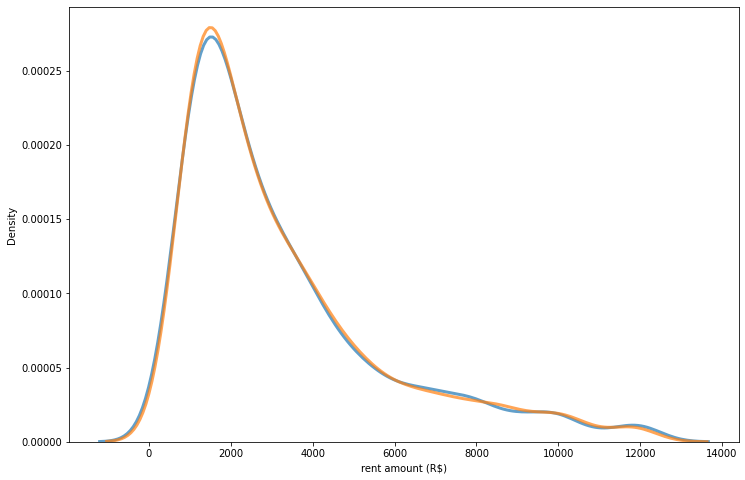

In [ ]:
plt.figure(figsize=(12, 8))

sns.kdeplot(y_test, palette="crest", alpha=.7,linewidth=3) 
sns.kdeplot(preds, palette="crest", alpha=.7, linewidth=3)

plt.show()


Embora o modelo tenha previsto valores mais altos na faixa de 2.000,00, ele parece fazer um bom trabalho de previsão dos outros valores.

# Salvar modelo

In [ ]:
from joblib import dump, load
dump(model, 'model_2.joblib')
model = load('model_2.joblib')

[01:45:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
